In [235]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as spo
from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import exponweib
import pandas as pd

#Procesos de Markov

##Problema 3
En una cadena de producción existen dos estaciones: la estación de producción y la estación de empaque. En la estación de producción, hay una probabilidad del $90\%$ de que el producto avance a la estación de empaque y una probabilidad del $10\%$ de que el producto tenga un defecto, lo que hace que permanezca en la etapa de producción. Una vez que el producto llega a la estación de empaque, tiene una probabilidad del $95\%$ de ser enviado al mercado y una probabilidad del $5\%$ de quedarse en la estación de empaque. Resuelva el problema anterior suponiendo que el $2\%$ de la veces el cliente regresa el
producto y va directamente a producción.

###(a)
Describa las variables observables del problema.


El producto puede estar en tres estados: En estado de producción, en estado de empaque o entregado en el mercado.

###(b)
Defina el conjunto de estados $S = \{S_1, S_2, S_1\}$.

* $S_1 =$ Producción.
* $S_2 =$ Empaquetado.
* $S_3 =$ Mercado.

###(c)
Construya la matriz de transición de este proceso estocástico.

\begin{equation}
T=
\begin{pmatrix}
    & \mathbb{P}_{*1}& \mathbb{P}_{*2}& \mathbb{P}_{*3}\\
    S_1 & 0.1 & 0.9 & 0\\
    S_2 & 0 & 0.05 & 0.95\\
    S_3 & 0.02 & 0 & 0.98
\end{pmatrix}
\end{equation}

In [236]:
S_1 = np.array([0.1,0.9,0])
S_2 = np.array([0,0.05,0.95])
S_3 = np.array([0.02,0,0.98])
T = np.array([S_1,S_2,S_3])
T

array([[0.1 , 0.9 , 0.  ],
       [0.  , 0.05, 0.95],
       [0.02, 0.  , 0.98]])

###(d)
Encuentre el estado estable tanto algebraicamente como numéricamente. Recuerde
$\pi\mathbb{P}=\pi$ para el estado estable. ¿Qué interpretación le da al estado estable?

\begin{equation}
    \pi\cdot T=\pi\\
\end{equation}

\begin{equation}
\Rightarrow(\pi_1,\pi_2,\pi_3)
\begin{pmatrix}
    & \mathbb{P}_{*1}& \mathbb{P}_{*2}& \mathbb{P}_{*3}\\
    S_1 & 0.1 & 0.9 & 0\\
    S_2 & 0 & 0.05 & 0.95\\
    S_3 & 0.02 & 0 & 0.98
\end{pmatrix}
=(\pi_1,\pi_2,\pi_3)\\
\end{equation}

\begin{equation}
\begin{aligned}
0.1\pi_1 + 0\pi_2 + 0.2\pi_3 &= \pi_1\\
0.9\pi_1 + 0.05\pi_2 + 0\pi_3 &= \pi_2\\
0\pi_1 + 0.95\pi_2 + 0.98\pi_3 &= \pi_3\\
\\
\frac{\pi_1-0.1\pi_1}{0.2}&=\pi_3\\
\frac{\pi_2-0.05\pi_2}{0.9} &= \pi_1\\
\frac{\pi_3-0.98\pi_3}{0.95} &= \pi_2\\
\\
4.5\pi_1&=\pi_3\\
1.055\pi_2 &= \pi_1\\
0.021\pi_3 &= \pi_2\\
\\
\pi_3=4.5\cdot1.055\sind
\end{aligned}
\end{equation}

In [237]:
def Get_estado_estable (pi, T):
    pi_nuevo = np.dot(pi,T)
    while abs(pi-pi_nuevo).any()>1e-15:
        pi = pi_nuevo
        pi_nuevo = np.dot(pi,T)
    return pi

In [238]:
pi = Get_estado_estable(np.array([1,0,0]),T)
pi

array([0.02130045, 0.02017937, 0.95852018])

El estado estable nos dice que

###(e)
Determine la probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo.

In [239]:
prob_ambas_ocupadas = round(pi[0] * pi[1] * 100, 3)
print(f"La probabilidad de que ambas estaciones esten ocupadas al mismo tiempo es del {prob_ambas_ocupadas}%")

La probabilidad de que ambas estaciones esten ocupadas al mismo tiempo es del 0.043%


###(f)
Determine la probabilidad en estado estable de que al menos una estación esté ocupada.

In [240]:
prob_al_menos_una_ocupada = round((1 - pi[2]) * 100, 2)
print(f"La probabilidad de que al menos una estación esté ocupada es del {prob_al_menos_una_ocupada}%")

La probabilidad de que al menos una estación esté ocupada es del 4.15%


###(g)
Determine la probabilidad en estado estable de que la estación de producción esté vacía.

In [241]:
prob_produccion_vacia = round((pi[1] + pi[2])*100,2)
print(f"La probabilidad de que la estación de producción esté vacía es del {prob_produccion_vacia}%")

La probabilidad de que la estación de producción esté vacía es del 97.87%


#Ejercicios estimación de parámetros

##Problema 10 - Higgs boson discovery
Imagine que se encuentra en el laboratorio **CERN** y está colaborando en el descubrimiento de una nueva partícula. Una de sus tareas es realizar la estimación de parámetros de la nueva partícula, la cuál está caracterizada por su masa y su ancho. Para realizar esta tarea se sugiere la siguiente estrategía:

###(a)
Descargue los datos de la masa invariante de dos fotones *Higgs dataset*. Estamos
estudiando el canal de Higgs a dos fotones $(H\rightarrow\gamma\gamma)$.

In [242]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"

In [243]:
df = pd.read_csv(url)
df

,Higgs
0,110.788333
1,104.852170
2,104.306032
3,135.544092
4,109.723066
...,...
2245,121.914791
2246,125.824833
2247,123.052246
2248,125.467228


###(b)
Dibuje la distribución de frecuencia de los datos entre $100$ y $160 GeV$, en 30 bines.
El dibujo debería tener la barra de error del histograma. Use el siguiente código: **plt.errorbar(m,HSignalBkg, yerr=0.5*np.sqrt(HSignalBkg), fmt='none',ecolor='k',capsize=5)**

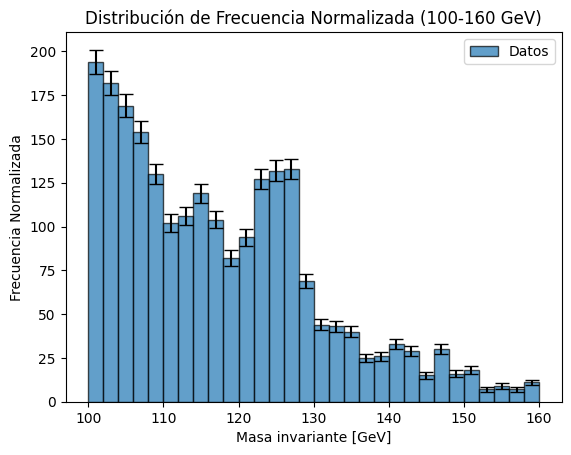

In [244]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
df = pd.read_csv(url)
df

data = df[(df['Higgs'] >= 100) & (df['Higgs'] <= 160)]['Higgs']

HSignalBkg, bin_edges = np.histogram(data, bins=30, range=(100, 160), density=False)

yerr = 0.5 * np.sqrt(HSignalBkg)
m = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.bar(m, HSignalBkg, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, edgecolor="k", label="Datos")
plt.errorbar(m, HSignalBkg, yerr=yerr, fmt='none', ecolor='k', capsize=5)

plt.title("Distribución de Frecuencia Normalizada (100-160 GeV)")
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("Frecuencia Normalizada")
plt.legend()
plt.show()

###(c)
Defina el modelo para la hipótesis nula, es decir el escenario donde no existe el bosón de Higgs:
\begin{equation}
    \mathcal{L}(\alpha,x)=\frac{1}{\alpha}e^{-\frac{x-100}{\alpha}}
\end{equation}
Donde $\alpha$ es el parámetro a ser determinado.

In [245]:
def HipotesisNula(alpha,x):
    return (1/alpha) * np.exp(-(x-100)/alpha)

###(d)
Defina la función de minimizar, en este caso es el negativo de la función conjunta de
verosimilud:
\begin{equation}
    \mathcal{L}(\alpha,x)=-\sum_{i=1}^{n}\ln(\mathcal{L}(\alpha,x_i)).
\end{equation}

In [246]:
def funcion_minimizar(alpha,x):
    return -np.sum(np.log(HipotesisNula(alpha,x)))

###(e)
Use el paquete **optimize** para encontrar el parámetro de la hipótesis nula. Use el siguiente límite del parámetro: **bounds = ( (0,50), )**.

In [247]:
x_data = data.values
alpha_inicial = [10.]

alpha = spo.minimize(funcion_minimizar, alpha_inicial, args=(x_data,), bounds=[(0, 50)]).x[0]
alpha

17.61888053628762

###(f)
Dibuje los datos y el modelo. Debería encontrar algo como:
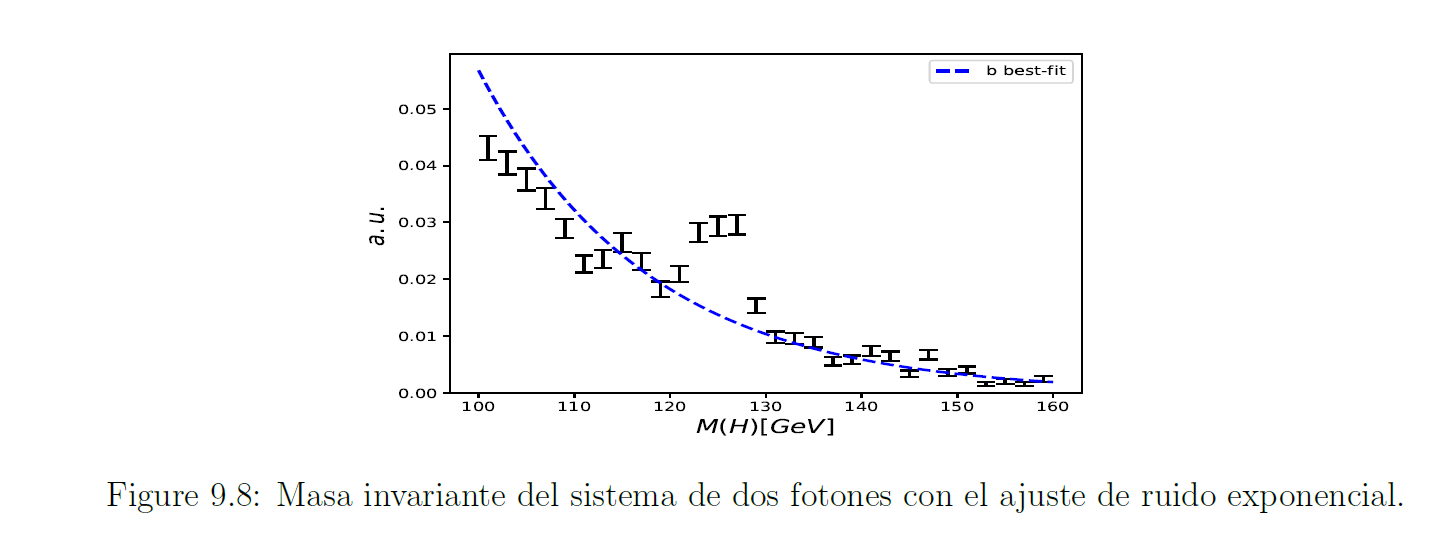

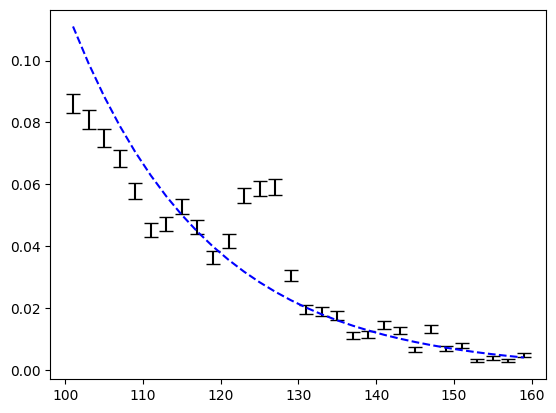

In [248]:
total_events = np.sum(HSignalBkg)
HSignalBkg_normalized = HSignalBkg / total_events
error_normalized = 0.5 * np.sqrt(HSignalBkg) / total_events

plt.errorbar(m, HSignalBkg_normalized, yerr=error_normalized, fmt='none', ecolor='k', capsize=5)
model_null_vals = HipotesisNula(alpha, m)
model_null_vals_normalized = model_null_vals / np.sum(model_null_vals)
plt.plot(m, model_null_vals_normalized, 'b--', label='b best-fit')

###(g)
Defina el modelo para la hipótesis alternativa, es decir el escenario donde si existe el bosón de Hisggs:
\begin{equation}
    \mathcal{L}(A,\mu,\sigma,\alpha,x)=(A)\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}+(1-A)\frac{1}{\alpha}e^{-\frac{x-100}{\alpha}}
\end{equation}
Donde $A,\mu,\sigma,\alpha$ son los parámetros a ser determinados. $A$ es la proporción de eventos de señal respecto al ruido experimental, $\mu$ es la masa de la resonancia, $\sigma$ es el ancho de la resonancia, y $\alpha$ es la constante de decaimiento de background.

In [249]:
def HipotesisAlternativa(params, x):
    A,mu,sigma,alpha = params
    signal = A * (1/np.sqrt(2*np.pi*(sigma**2)))  *  np.exp(-(x-mu)**2 / (2*sigma**2))
    background =(1 - A) * (1/alpha) * np.exp(-(x-100)/alpha)
    return signal + background

###(h)
Defina la función de minimizar, en este caso es el negativo de la función conjunta de
verosimilud:
\begin{equation}
    \mathcal{L}(A,\mu,\sigma,\alpha,x)=-\sum_{i=1}^{n}\ln(\mathcal{L}(A,\mu,\sigma,\alpha,x_i)).
\end{equation}

In [250]:
def funcion_minimizar_alternativa(params,x=data):
    return -np.sum(np.log(HipotesisAlternativa(params,x)))

###(i)
Use el paquete ***optimize*** para encontrar el parámetro de la hipótesis nula. Use el
siguiente límite del parámetro: **bounds = ( (0,1),(50,500),(1,100), (1,100)
)**.

In [251]:
bounds_alt = [(0, 1), (100, 150), (1, 10), (1, 50)]
result_alt = spo.minimize(funcion_minimizar_alternativa, x0=[0.5, 125, 5, 10], bounds=bounds_alt)
A_best, mu_best, sigma_best, alpha_best_alt = result_alt.x

###(j)
Encuentre el mejor ajuste de la hipótesis alternativa y dibuje ambos ajustes:
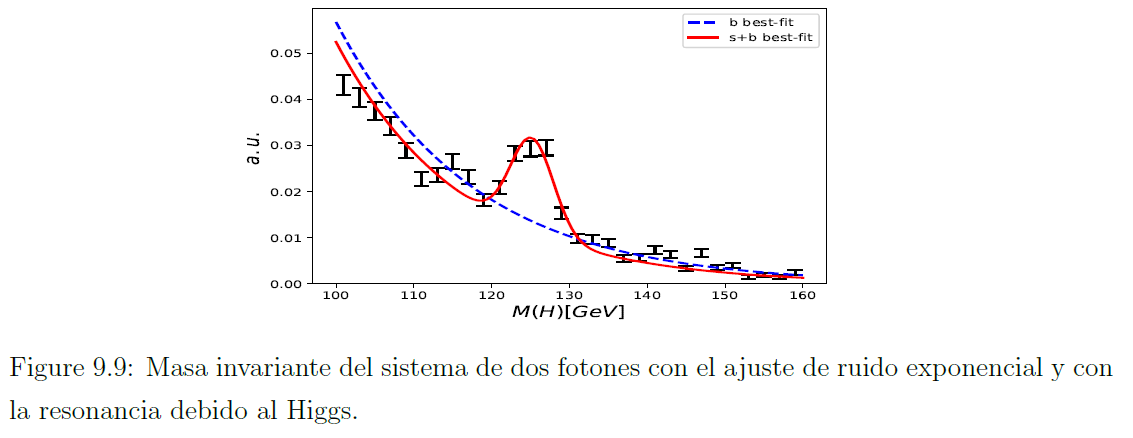

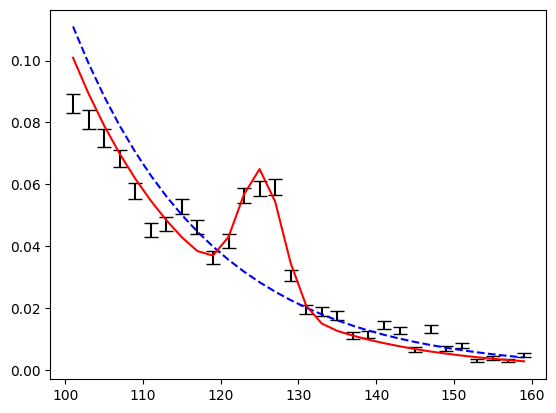

In [252]:
plt.errorbar(m, HSignalBkg_normalized, yerr=error_normalized, fmt='none', ecolor='k', capsize=5)

model_null_vals = HipotesisNula(alpha, m)
model_null_vals_normalized = model_null_vals / np.sum(model_null_vals)
plt.plot(m, model_null_vals_normalized, 'b--', label='b best-fit')

model_alt_vals = HipotesisAlternativa(result_alt.x, m)
model_alt_vals_normalized = model_alt_vals / np.sum(model_alt_vals)
plt.plot(m, model_alt_vals_normalized, 'r-', label='s+b best-fit')

###(k)
¿Cuál es el valor de las constantes físicas? $A,\mu,\sigma,\alpha$

In [253]:
A = result_alt.x[0]
mu = result_alt.x[1]
sigma = result_alt.x[2]
alpha_alt = result_alt.x[3]
print(f"A: {A}")
print(f"mu: {mu}")
print(f"sigma: {sigma}")
print(f"alpha: {alpha_alt}")

A: 0.14211045948101114
mu: 125.19835689840639
sigma: 2.775367107381082
alpha: 16.363303381892813


###(l)
Estime el número de desviaciones estándar entre la observación y la hipótesis nula:
\begin{equation}
    n\sigma\approx\sqrt{-2\ln\left(\frac{\mathcal{L}(A,\mu,\sigma,\alpha,x)}{\mathcal{L}(\alpha,x)}\right)}
\end{equation}
¡Si este valor es mayor a 5 se puede proclamar un descubrimiento! La formula es una aproximación descrita en [Upper limits in HEP](https://arxiv.org/html/2411.00706v1#S4)

In [261]:
log_likelihood_null = -funcion_minimizar(alpha, m)
log_likelihood_alt = -funcion_minimizar_alternativa(result_alt.x, m)
n_sigma = np.sqrt(-2 * (log_likelihood_alt - log_likelihood_null)) # Se cambio la ecuacion aprovechando las propiedades del logaritmo =)
print(f"Desviaciones estándar (nσ): {n_sigma:.2f}")

Desviaciones estándar (nσ): 2.04


###(m)
Con el valor de $\sigma$, encuentre el tiempo de vida de la partícula:
\begin{equation}
    \tau=\frac{\hbar}{\sigma}
\end{equation}
donde $\hbar=1.015\times10^{-23}J\cdot s$. Debe convertir la unidad $GeV$ a $J$

In [262]:
h_barra = 1.015e-23
gev_to_j  = 1.60218e-10
lifetime = h_barra / (sigma * gev_to_j)
print(f"Tiempo de vida medio: {lifetime:.2e} s")

Tiempo de vida medio: 2.28e-14 s


In [263]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.6 MB/s eta 0:00:00


In [264]:
import emcee

In [265]:
def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.
    else:
        return -np.inf

In [272]:
# Paquete
n_walkers, n_params = 10,4
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 2
p0[:,1] = 2
p0 += np.random.rand(n_walkers, n_params)

In [273]:
def LogPosterior(p,x):

  LogP = LogPrior(p)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP + funcion_minimizar_alternativa(p,x)

In [274]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(x_data,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [00:06<00:00, 1629.53it/s]


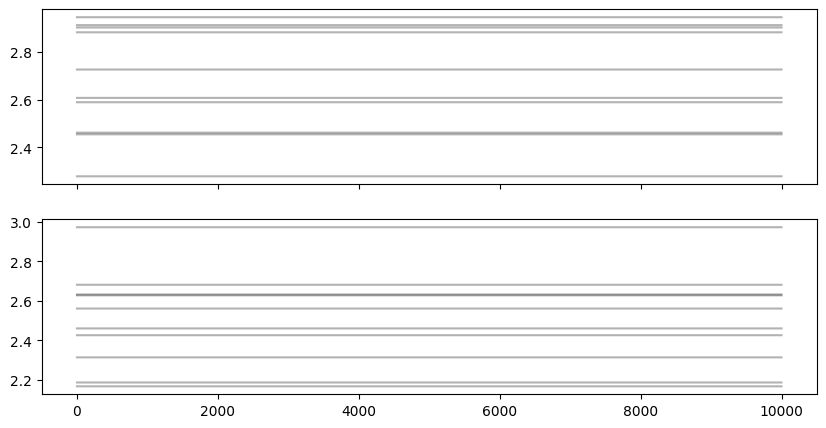

In [278]:
fig, axes = plt.subplots(2, figsize=(10,5), sharex=True)

samples = sampler.get_chain()
labels = ["A", "mu", "sigma", "alpha"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)

#Ejercicios: Hypothesis testing

##Problema 4: Tiempo de escape de un fotón del sol
Un fotón $(\gamma )$ se crea por procesos de fusión en el centro del sol. Vamos a estimar el tiempo medio que tarda en escapar, usando un modelo de caminata aleatoria en **3D**. Considere el camino libre medio del fotón $\ell=0.1$ y el radio del sol $R_s=1$ (en algún sistema de unidades). Genere una caminata aleatoria en coordenadas esféricas para estimar el número promedio de pasos que le toma al fotón escapar del sol. Reucerde lo siguiente:

\begin{equation}
    x_{i+1}=x_i+\ell sin\theta cos\phi\\
    y_{i+1}=y_i+\ell sin\theta cos\phi\\
    z_{i+1}=z_i+\ell cos\theta
\end{equation}

el dominio de las variables angulares son $\theta\in[0,\pi]$ y $\phi\in[0,2\pi]$.

###(a)
Genere $N=1000$ fotones aleatorios y retorne cuántos pasos le toma salir al fotón desde el centro del sol (i.e, $\sqrt{x^2+y^2+z^2}>r$ termina el ciclo).

In [ ]:
def caminata_foton (N, R, l):
    X = np.zeros(N, dtype=object)
    Y = np.zeros(N, dtype=object)
    Z = np.zeros(N, dtype=object)
    Pasos = np.zeros(N, dtype=int)
    for i in range(N):
        x,y,z = 0.,0.,0.
        _x = np.array([x])
        _y = np.array([y])
        _z = np.array([z])
        pasos = 0
        while np.sqrt(x**2+y**2+z**2)<R:
            theta = np.random.uniform(0,np.pi)
            phi = np.random.uniform(0,2*np.pi)
            x += l*np.sin(theta)*np.cos(phi)
            y += l*np.sin(theta)*np.sin(phi)
            z += l*np.cos(theta)
            _x = np.append(_x,x)
            _y = np.append(_y,y)
            _z = np.append(_z,z)
            pasos += 1
        Pasos[i] = pasos
        X[i] = _x
        Y[i] = _y
        Z[i] = _z
    return X,Y,Z,Pasos

In [ ]:
N=1000
R=1
l=0.1
X,Y,Z,Pasos = caminata_foton(N,R,l)

In [ ]:
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 50)
phi, theta = np.meshgrid(phi, theta)


x_graf = np.sin(phi) * np.cos(theta)
y_graf = np.sin(phi) * np.sin(theta)
z_graf = np.cos(phi)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x_graf, y_graf, z_graf, alpha=0.1, color='w', edgecolor='gray')

trayectorias_a_graficar = random.sample(range(N), 5)
colors = plt.cm.viridis(np.linspace(0, 1, 5))
for idx, i in enumerate(trayectorias_a_graficar):
    _x = X[i]
    _y = Y[i]
    _z =Z[i]
    pasos = Pasos[i]
    ax.plot(_x, _y, _z, color=colors[idx], label=f"Pasos = {pasos}")

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.title("Ejemplo de 5 electrones")
plt.show()


###(b)
Elija una distribución de clases que tenga su valor mínimo y su máximo, en el mínimo y máximo de la distribución de pasos. Use $n = 20$ clases.

In [ ]:
n_clases = 20
bins = np.arange(np.min(Pasos),np.max(Pasos)+n_clases,n_clases)


###(c)
Construya la distribución de frecuencias y normalice correctamente a la unidad.

In [ ]:
plt.hist(Pasos, bins=bins, edgecolor='black', density=True)
plt.title("Distribución de pasos")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia Normalizada")
plt.show()

###(d)
Dibuje la distribución de frecuencias usando los métodos de clase.

In [ ]:
a,c,d,e = exponweib.fit(Pasos)

###(e)
Calcule el valor esperado del número de pasos que le toma al fotón escapar.

\begin{equation}
    \mathbb{E}=\sum_{i=1}^n H_im_i
\end{equation}

donde $H_i$ es el valor de la frecuencia relativa y $m_i$ es la marca de clase.

In [ ]:
n_clases = 20
hist, bins = np.histogram(Pasos, bins=n_clases, density=True)
bins_centers = (bins[:-1] + bins[1:]) / 2

valor_esperado = np.sum(hist * bins_centers * np.diff(bins))
print(f"Valor esperado: {valor_esperado:.2f}")

relacion_teorica = (R / l)**2
print(f"Relación teórica: {relacion_teorica:.2f}")

params = exponweib.fit(Pasos, floc=0, f0=1)
k, c, loc, scale = params
print(f"Parámetros Weibull ajustados: k={k:.2f}, c={c:.2f}, scale={scale:.2f}")

x = np.linspace(min(Pasos), max(Pasos), 1000)
weibull_pdf = exponweib.pdf(x, k, c, loc, scale)

plt.figure(figsize=(10, 6))
plt.hist(Pasos, bins=n_clases, density=True, alpha=0.75, label="Histograma de pasos", color="blue", edgecolor="black")
plt.plot(x, weibull_pdf, 'r--', label="Ajuste Weibull", linewidth=2)
plt.xlabel("Número de pasos")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución")
plt.legend()
plt.grid()
plt.show()

Rs = 700000
c = 300000
l_real = 0.6 / 100000
tiempo_escape = (Rs**2) / (l_real * c)
tiempo_escape_anios = tiempo_escape / (3600 * 24 * 365)
print(f"Tiempo promedio: {tiempo_escape_anios:.2f} años")